In [8]:
#pip install numpy pandas scikit-learn

In [53]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import linear_model

import matplotlib.pyplot as plt

import gzip
import json
import dateutil.parser
import random
import datetime

In [29]:
root = '../DSC_258/data'

In [30]:
f = gzip.open(root + "/fantasy_10000.json.gz")
dataset = []
for l in f:
    dataset.append(json.loads(l))

In [335]:
ratings = [d['rating'] for d in dataset]
lengths = [len(d['review_text']) for d in dataset]

print("first record of lengths: "+  str(lengths[0]))
print("longest length review: " +  str(max(lengths)))


first record of lengths: 2086
longest length review: 14306


In [13]:
dataset[0]

{'user_id': '8842281e1d1347389f2ab93d60773d4d',
 'book_id': '18245960',
 'review_id': 'dfdbb7b0eb5a7e4c26d59a937e2e5feb',
 'rating': 5,
 'review_text': 'This is a special book. It started slow for about the first third, then in the middle third it started to get interesting, then the last third blew my mind. This is what I love about good science fiction - it pushes your thinking about where things can go. \n It is a 2015 Hugo winner, and translated from its original Chinese, which made it interesting in just a different way from most things I\'ve read. For instance the intermixing of Chinese revolutionary history - how they kept accusing people of being "reactionaries", etc. \n It is a book about science, and aliens. The science described in the book is impressive - its a book grounded in physics and pretty accurate as far as I could tell. Though when it got to folding protons into 8 dimensions I think he was just making stuff up - interesting to think about though. \n But what would 

In [336]:
lengths_norm = [word/max(lengths) for word in lengths]
lengths_norm[0:2]

[0.14581294561722355, 0.10631902698168601]

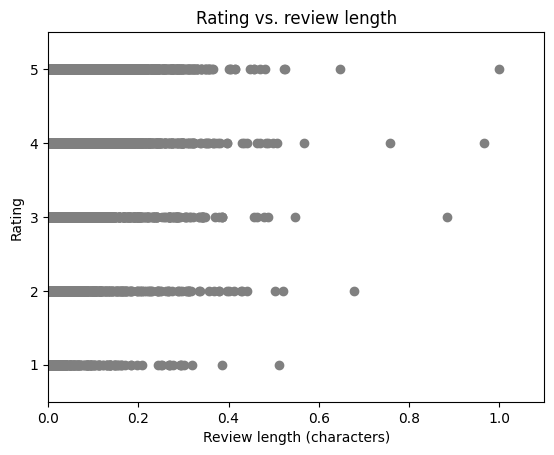

In [337]:
plt.scatter(lengths_norm, ratings, color='grey')
plt.xlim(0, 1.1)
plt.ylim(0.5, 5.5)
plt.xlabel("Review length (characters)")
plt.ylabel("Rating")
plt.title("Rating vs. review length")
plt.show()

In [338]:
X_norm = np.array([[1,l] for l in lengths_norm]) # Note the inclusion of the constant term
y = np.array(ratings).T

In [339]:
model = sk.linear_model.LinearRegression(fit_intercept=False)
model.fit(X_norm, y)

LinearRegression(fit_intercept=False)

In [340]:
theta = model.coef_
theta

array([3.68568136, 0.98335392])

In [341]:
xplot = np.arange(0,1.1,.1)
yplot = [(theta[0] + theta[1]*x).item() for x in xplot]

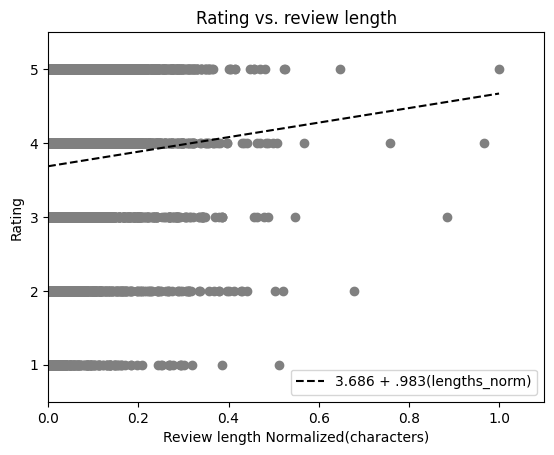

In [342]:
plt.scatter(lengths_norm, ratings, color='grey')
plt.plot(np.array(xplot), yplot, color = 'k', linestyle = '--',\
         label = f"3.686 + .983(lengths_norm)")
plt.xlim(0, 1.1)
plt.ylim(0.5, 5.5)
plt.xlabel("Review length Normalized(characters)")
plt.ylabel("Rating")
plt.title("Rating vs. review length")
plt.legend(loc='lower right')
plt.show()

In [343]:
y_pred = model.predict(X_norm)
sse = sum(x**2 for x in (y-y_pred))
mse = sse/len(y)
print(mse)

1.5522086622355356


/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [14]:
def Q1(dataset):
    ratings = [d['rating'] for d in dataset]
    lengths = [len(d['review_text']) for d in dataset]
    print("first record of lengths: "+  str(lengths[0]))
    print("longest length review: " +  str(max(lengths)))
    
    lengths_norm = [word/max(lengths) for word in lengths]
    X_norm = np.array([[1,l] for l in lengths_norm]) # Note the inclusion of the constant term
    y = np.array(ratings).T
    model = sk.linear_model.LinearRegression(fit_intercept=False)
    model.fit(X_norm, y)
    
    theta = model.coef_
    
    y_pred = model.predict(X_norm)
    sse = sum(x**2 for x in (y-y_pred))
    mse = sse/len(y)
    return theta, mse
    

In [345]:
Q1(dataset)

first record of lengths: 2086
longest length review: 14306


/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


(array([3.68568136, 0.98335392]), np.float64(1.5522086622355356))

In [34]:
def Q2(dataset):
    print("hotcoding DOW and Month features")
    day_of_week = []
    month_list = []

    ratings = [d['rating'] for d in dataset]
    lengths = [len(d['review_text']) for d in dataset]
    print("first record of lengths: "+  str(lengths[0]))
    print("longest length review: " +  str(max(lengths)))
    
    lengths_norm = [word/max(lengths) for word in lengths]
    X_norm = np.array([[1,l] for l in lengths_norm]) # Note the inclusion of the constant term
    y = np.array(ratings).T

    for d in dataset:
        dow = str(d['date_added']).split(' ')[0]    
        t = dateutil.parser.parse(d['date_added'])
    
        month_list.append(t.month)
        day_of_week.append(dow)
        
    month_arr = np.array(month_list).reshape(-1,1)
    dow_arr = np.array(day_of_week).reshape(-1,1)

    unique_days = np.unique(dow_arr)
    baseline = unique_days[0]
    unique_days_reduced = unique_days[1:,]
    print(baseline)
    print(unique_days_reduced)
    print("Number of Unique Days: " + str(len(unique_days)))
    print("Dimensions of Hot Encoded DOW feature: " + str(len(unique_days_reduced)))
    print(dow_arr.shape)
    dow_arr = np.reshape(dow_arr,(-1))

    dow_hot_encode = (dow_arr[:,None] == unique_days_reduced).astype(int)
    X_norm = np.hstack((X_norm,dow_hot_encode))


    unique_mo = np.unique(month_arr)
    baseline_m = unique_mo[0]
    unique_mo_reduced = unique_mo[1:,]
    print(baseline_m)
    print(unique_mo_reduced)
    print("Number of Unique Months: " + str(len(unique_mo)))
    print("Dimensions of Hot Encoded DOW feature: " + str(len(unique_mo_reduced)))
    print(month_arr.shape)
    month_arr = np.reshape(month_arr,(-1))

    mo_hot_encode = (month_arr[:,None] == unique_mo_reduced).astype(int)
    X_norm = np.hstack((X_norm,mo_hot_encode))

    model = sk.linear_model.LinearRegression(fit_intercept=False)
    model.fit(X_norm, y)
    theta = model.coef_

    y_pred = model.predict(X_norm)
    sse = sum(x**2 for x in (y-y_pred))
    mse = sse/len(y)
    print("X_norm, y, mse:")
    return X_norm,y,mse

In [12]:
Q2(dataset)

first record of lengths: 2086
longest length review: 14306
Fri
['Mon' 'Sat' 'Sun' 'Thu' 'Tue' 'Wed']
Number of Unique Days: 7
Dimensions of Hot Encoded DOW feature: 6
(10000, 1)
1
[ 2  3  4  5  6  7  8  9 10 11 12]
Number of Unique Months: 12
Dimensions of Hot Encoded DOW feature: 11
(10000, 1)


/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


(array([[1.00000000e+00, 1.45812946e-01, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 1.06319027e-01, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 1.06179225e-01, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [1.00000000e+00, 6.64057039e-03, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 2.09702223e-04, 1.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 5.95554313e-02, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([3.86118833, 3.85258535, 3.65524435, ..., 3.71766814, 3.63544631,
        3.65373133]),
 np.float64(1.546631549848753))

In [18]:
def Q3(dataset):
    print("DOW and Month features as numeric")
    day_of_week = []
    weekday_num = []
    month_list = []
    month_num = []

    ratings = [d['rating'] for d in dataset]
    lengths = [len(d['review_text']) for d in dataset]

    for d in dataset:
        dow = str(d['date_added']).split(' ')[0]    
        t = dateutil.parser.parse(d['date_added'])

        month_list.append(t.month)
        day_of_week.append(dow)
        weekday_num.append(t.weekday())
        month_num.append(t.month)

    print("first record of lengths: "+  str(lengths[0]))
    print("longest length review: " +  str(max(lengths)))
    weekday_num = np.array(weekday_num).reshape(-1,1)
    month_num = np.array(month_num).reshape(-1,1)

    X_norm = np.array([[1,l] for l in lengths]) # Note the inclusion of the constant term
    X_norm = np.hstack((X_norm,weekday_num))
    X_norm = np.hstack((X_norm,month_num))
    y = np.array(ratings).T

    model = sk.linear_model.LinearRegression(fit_intercept=False)
    model.fit(X_norm, y)
    theta = model.coef_

    y_pred = model.predict(X_norm)
    sse = sum(x**2 for x in (y-y_pred))
    mse1 = sse/len(y)
    print("X_norm, y, mse:")
    return X_norm,y,mse1

In [33]:
Q3(dataset)

first record of lengths: 2086
longest length review: 14306
first record of lengths: 2086
longest length review: 14306


/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


Fri
['Mon' 'Sat' 'Sun' 'Thu' 'Tue' 'Wed']
Number of Unique Days: 7
Dimensions of Hot Encoded DOW feature: 6
(10000, 1)
1
[ 2  3  4  5  6  7  8  9 10 11 12]
Number of Unique Months: 12
Dimensions of Hot Encoded DOW feature: 11
(10000, 1)
1.5516353711453312
1.546631549848753


/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


(array([[1.00000000e+00, 1.45812946e-01, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 1.06319027e-01, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 1.06179225e-01, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [1.00000000e+00, 6.64057039e-03, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 2.09702223e-04, 1.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 5.95554313e-02, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([5, 5, 5, ..., 0, 2, 3]),
 np.float64(1.5516353711453312),
 np.float64(1.546631549848753))

In [5]:
dataset4 = dataset[:]
random.seed(0)
random.shuffle(dataset4)


In [25]:
cut = int(len(dataset4)/2)
end = int(len(dataset4))

In [26]:
dataset_train = dataset4[0:cut]
dataset_test = dataset4[cut:end]

In [27]:
print(len(dataset_train))
print(len(dataset_test))

5000
5000


In [20]:
Q2(dataset_train)

hotcoding DOW and Month features
first record of lengths: 258
longest length review: 13841
Fri
['Mon' 'Sat' 'Sun' 'Thu' 'Tue' 'Wed']
Number of Unique Days: 7
Dimensions of Hot Encoded DOW feature: 6
(5000, 1)
1
[ 2  3  4  5  6  7  8  9 10 11 12]
Number of Unique Months: 12
Dimensions of Hot Encoded DOW feature: 11
(5000, 1)
X_norm, y, mse:


/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


(array([[1.        , 0.01864027, 0.        , ..., 1.        , 0.        ,
         0.        ],
        [1.        , 0.04638393, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.08330323, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [1.        , 0.05093563, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.01401633, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.13756231, 0.        , ..., 0.        , 1.        ,
         0.        ]]),
 array([0, 4, 5, ..., 4, 3, 3]),
 np.float64(1.472504694693771))

In [ ]:
def Q2_sub(dataset):

    day_of_week = []
    month_list = []

    ratings = [d['rating'] for d in dataset]
    lengths = [len(d['review_text']) for d in dataset]
    print("first record of lengths: "+  str(lengths[0]))
    print("longest length review: " +  str(max(lengths)))
    
    lengths_norm = [word/max(lengths) for word in lengths]
    X_norm = np.array([[1,l] for l in lengths_norm]) # Note the inclusion of the constant term
    y = np.array(ratings).T

    for d in dataset:
        dow = str(d['date_added']).split(' ')[0]    
        t = dateutil.parser.parse(d['date_added'])
    
        month_list.append(t.month)
        day_of_week.append(dow)
        
    month_arr = np.array(month_list).reshape(-1,1)
    dow_arr = np.array(day_of_week).reshape(-1,1)

    unique_days = np.unique(dow_arr)
    baseline = unique_days[0]
    unique_days_reduced = unique_days[1:,]
    print(baseline)
    print(unique_days_reduced)
    print("Number of Unique Days: " + str(len(unique_days)))
    print("Dimensions of Hot Encoded DOW feature: " + str(len(unique_days_reduced)))
    print(dow_arr.shape)
    dow_arr = np.reshape(dow_arr,(-1))

    dow_hot_encode = (dow_arr[:,None] == unique_days_reduced).astype(int)
    X_norm = np.hstack((X_norm,dow_hot_encode))


    unique_mo = np.unique(month_arr)
    baseline_m = unique_mo[0]
    unique_mo_reduced = unique_mo[1:,]
    print(baseline_m)
    print(unique_mo_reduced)
    print("Number of Unique Months: " + str(len(unique_mo)))
    print("Dimensions of Hot Encoded DOW feature: " + str(len(unique_mo_reduced)))
    print(month_arr.shape)
    month_arr = np.reshape(month_arr,(-1))

    mo_hot_encode = (month_arr[:,None] == unique_mo_reduced).astype(int)
    X_norm = np.hstack((X_norm,mo_hot_encode))

    model = sk.linear_model.LinearRegression(fit_intercept=False)
    model.fit(X_norm, y)
    theta = model.coef_

    y_pred = model.predict(X_norm)
    sse = sum(x**2 for x in (y-y_pred))
    mse = sse/len(y)
    return model


In [44]:
def processing_hotcode(dataset):
    day_of_week = []
    month_list = []

    ratings = [d['rating'] for d in dataset]
    lengths = [len(d['review_text']) for d in dataset]
    print("first record of lengths: "+  str(lengths[0]))
    print("longest length review: " +  str(max(lengths)))
    
    lengths_norm = [word/max(lengths) for word in lengths]
    X_norm = np.array([[1,l] for l in lengths_norm]) # Note the inclusion of the constant term
    y = np.array(ratings).T

    for d in dataset:
        dow = str(d['date_added']).split(' ')[0]    
        t = dateutil.parser.parse(d['date_added'])
    
        month_list.append(t.month)
        day_of_week.append(dow)
        
    month_arr = np.array(month_list).reshape(-1,1)
    dow_arr = np.array(day_of_week).reshape(-1,1)

    unique_days = np.unique(dow_arr)
    baseline = unique_days[0]
    unique_days_reduced = unique_days[1:,]
    print(baseline)
    print(unique_days_reduced)
    print("Number of Unique Days: " + str(len(unique_days)))
    print("Dimensions of Hot Encoded DOW feature: " + str(len(unique_days_reduced)))
    print(dow_arr.shape)
    dow_arr = np.reshape(dow_arr,(-1))

    dow_hot_encode = (dow_arr[:,None] == unique_days_reduced).astype(int)
    X_norm = np.hstack((X_norm,dow_hot_encode))


    unique_mo = np.unique(month_arr)
    baseline_m = unique_mo[0]
    unique_mo_reduced = unique_mo[1:,]
    print(baseline_m)
    print(unique_mo_reduced)
    print("Number of Unique Months: " + str(len(unique_mo)))
    print("Dimensions of Hot Encoded DOW feature: " + str(len(unique_mo_reduced)))
    print(month_arr.shape)
    month_arr = np.reshape(month_arr,(-1))

    mo_hot_encode = (month_arr[:,None] == unique_mo_reduced).astype(int)
    X_norm = np.hstack((X_norm,mo_hot_encode))
    return X_norm,y

In [45]:
def processing_std(dataset): 
    day_of_week = []
    weekday_num = []
    month_list = []
    month_num = []

    ratings = [d['rating'] for d in dataset]
    lengths = [len(d['review_text']) for d in dataset]

    for d in dataset:
        dow = str(d['date_added']).split(' ')[0]    
        t = dateutil.parser.parse(d['date_added'])

        month_list.append(t.month)
        day_of_week.append(dow)
        weekday_num.append(t.weekday())
        month_num.append(t.month)

    print("first record of lengths: "+  str(lengths[0]))
    print("longest length review: " +  str(max(lengths)))
    weekday_num = np.array(weekday_num).reshape(-1,1)
    month_num = np.array(month_num).reshape(-1,1)

    X_norm = np.array([[1,l] for l in lengths]) # Note the inclusion of the constant term
    X_norm = np.hstack((X_norm,weekday_num))
    X_norm = np.hstack((X_norm,month_num))
    y = np.array(ratings).T
    return X_norm,y

In [48]:
def Q4(dataset):
    dataset4 = dataset[:]
    random.seed(0)
    random.shuffle(dataset4)
    cut = int(len(dataset4)/2)
    end = int(len(dataset4))
    dataset_train = dataset4[0:cut]
    dataset_test = dataset4[cut:end]

    print("Processing Training Data Hot Encode:")    
    print()
    X_norm,y = processing_hotcode(dataset_test)

    model = sk.linear_model.LinearRegression(fit_intercept=False)
    model.fit(X_norm, y)
    theta = model.coef_

    X_norm_test, y_test = processing_hotcode(dataset_test)
   
    y_pred = model.predict(X_norm_test)
    sse = sum(x**2 for x in (y_test-y_pred))
    mse1 = sse/len(y_test)
    print("test mse:")

    X_norm, y = processing_std(dataset_train)
    model = sk.linear_model.LinearRegression(fit_intercept=False)
    model.fit(X_norm, y)
    theta = model.coef_

    X_norm_test, y_test = processing_std(dataset_test)
    y_pred = model.predict(X_norm_test)
    sse = sum(x**2 for x in (y_test-y_pred))
    mse2 = sse/len(y_test)
    print("test mse2:")
    
    return mse1, mse2
    

In [49]:
Q4(dataset)

Processing Training Data Hot Encode:

first record of lengths: 496
longest length review: 14306
Fri
['Mon' 'Sat' 'Sun' 'Thu' 'Tue' 'Wed']
Number of Unique Days: 7
Dimensions of Hot Encoded DOW feature: 6
(5000, 1)
1
[ 2  3  4  5  6  7  8  9 10 11 12]
Number of Unique Months: 12
Dimensions of Hot Encoded DOW feature: 11
(5000, 1)
first record of lengths: 496
longest length review: 14306
Fri
['Mon' 'Sat' 'Sun' 'Thu' 'Tue' 'Wed']
Number of Unique Days: 7
Dimensions of Hot Encoded DOW feature: 6
(5000, 1)
1
[ 2  3  4  5  6  7  8  9 10 11 12]
Number of Unique Months: 12
Dimensions of Hot Encoded DOW feature: 11
(5000, 1)
test mse:
first record of lengths: 258
longest length review: 13841


/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


first record of lengths: 496
longest length review: 14306
test mse2:


/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


(np.float64(1.615122529856349), np.float64(1.6282919476176065))

In [70]:
f = open("../DSC_258/data/beer_50000.json")
datasetB = []
for l in f:
    datasetB.append(eval(l))

In [51]:
datasetB[0]

{'review/appearance': 2.5,
 'beer/style': 'Hefeweizen',
 'review/palate': 1.5,
 'review/taste': 1.5,
 'beer/name': 'Sausa Weizen',
 'review/timeUnix': 1234817823,
 'beer/ABV': 5.0,
 'beer/beerId': '47986',
 'beer/brewerId': '10325',
 'review/timeStruct': {'isdst': 0,
  'mday': 16,
  'hour': 20,
  'min': 57,
  'sec': 3,
  'mon': 2,
  'year': 2009,
  'yday': 47,
  'wday': 0},
 'review/overall': 1.5,
 'review/text': 'A lot of foam. But a lot.\tIn the smell some banana, and then lactic and tart. Not a good start.\tQuite dark orange in color, with a lively carbonation (now visible, under the foam).\tAgain tending to lactic sourness.\tSame for the taste. With some yeast and banana.',
 'user/profileName': 'stcules',
 'review/aroma': 2.0}

In [56]:
X = [[1, len(d['review/text'])] for d in datasetB]
y = [d['review/overall'] >= 4 for d in datasetB]

In [57]:
mod = sk.linear_model.LogisticRegression(fit_intercept=False)
mod.fit(X,y)

/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept


LogisticRegression(fit_intercept=False)

In [58]:
mod = sk.linear_model.LogisticRegression(class_weight='balanced')
mod.fit(X,y)
predictions = mod.predict(X)

/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/mattzidell/Documents/GitHub/DSC_258/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/mattzidell/Do

In [59]:
correct = predictions == y
sum(correct) / len(correct)

TP = sum([(p and l) for (p,l) in zip(predictions, y)])
FP = sum([(p and not l) for (p,l) in zip(predictions, y)])
TN = sum([(not p and not l) for (p,l) in zip(predictions, y)])
FN = sum([(not p and l) for (p,l) in zip(predictions, y)])

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

BER = 1 - 1/2 * (TPR + TNR)
BER

np.float64(0.4683031525957275)

In [ ]:
def featureQ5(dataset):
    X = [[1, len(d['review/text'])] for d in dataset]
    y = [d['review/overall'] >= 4 for d in dataset]
    return X, y

In [71]:
def featureQ7(dataset):
    X = [[1, len(d['review/text']),d['review/palate']] for d in dataset]
    y = [d['review/overall'] >= 4 for d in dataset]
    return X, y

In [72]:
featureQ7(datasetB)

([[1, 262, 1.5],
  [1, 338, 3.0],
  [1, 396, 3.0],
  [1, 401, 2.5],
  [1, 1145, 4.0],
  [1, 728, 3.0],
  [1, 471, 4.0],
  [1, 853, 2.0],
  [1, 472, 3.5],
  [1, 1035, 4.0],
  [1, 2073, 4.0],
  [1, 640, 3.5],
  [1, 552, 2.5],
  [1, 1272, 3.0],
  [1, 555, 3.0],
  [1, 1667, 2.5],
  [1, 394, 4.0],
  [1, 598, 4.0],
  [1, 328, 3.0],
  [1, 749, 3.5],
  [1, 331, 4.0],
  [1, 430, 4.0],
  [1, 872, 4.0],
  [1, 516, 3.5],
  [1, 597, 4.0],
  [1, 415, 4.0],
  [1, 612, 4.0],
  [1, 697, 4.0],
  [1, 819, 4.0],
  [1, 452, 4.0],
  [1, 904, 4.0],
  [1, 752, 4.0],
  [1, 635, 4.0],
  [1, 792, 2.0],
  [1, 882, 4.0],
  [1, 597, 4.0],
  [1, 1487, 4.5],
  [1, 950, 4.0],
  [1, 311, 4.0],
  [1, 362, 4.0],
  [1, 984, 3.5],
  [1, 270, 4.0],
  [1, 408, 4.5],
  [1, 784, 3.0],
  [1, 1112, 4.0],
  [1, 1033, 4.5],
  [1, 537, 3.5],
  [1, 713, 3.5],
  [1, 623, 4.0],
  [1, 625, 4.0],
  [1, 986, 4.5],
  [1, 1005, 4.0],
  [1, 1321, 4.0],
  [1, 665, 4.5],
  [1, 1186, 4.0],
  [1, 402, 4.0],
  [1, 914, 3.5],
  [1, 603, 3.5],
  [

In [ ]:
def Q5(dataset, feature_fn):
    X, y = feature_fn(dataset)

    mod = sk.linear_model.LogisticRegression(class_weight='balanced')
    mod.fit(X,y)
    predictions = mod.predict(X)
    correct = predictions == y
    sum(correct) / len(correct)

    TP = sum([(p and l) for (p,l) in zip(predictions, y)])
    FP = sum([(p and not l) for (p,l) in zip(predictions, y)])
    TN = sum([(not p and not l) for (p,l) in zip(predictions, y)])
    FN = sum([(not p and l) for (p,l) in zip(predictions, y)])

    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)

    BER = 1 - 1/2 * (TPR + TNR)
    BER
    return TP, TN, FP, FN, BER

In [ ]:
def Q7(dataset, feature_fn):
    X, y = feature_fn(dataset)

    mod = sk.linear_model.LogisticRegression(class_weight='balanced')
    mod.fit(X,y)
    predictions = mod.predict(X)
    correct = predictions == y
    sum(correct) / len(correct)

    TP = sum([(p and l) for (p,l) in zip(predictions, y)])
    FP = sum([(p and not l) for (p,l) in zip(predictions, y)])
    TN = sum([(not p and not l) for (p,l) in zip(predictions, y)])
    FN = sum([(not p and l) for (p,l) in zip(predictions, y)])

    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)

    BER = 1 - 1/2 * (TPR + TNR)
    BER
    return TP, TN, FP, FN, BER

In [68]:
precision = TP / (TP + FP)
precisions = []

predictions_1 = predictions[0]
predictions_100 = predictions[0:100]
predictions_1000 = predictions[0:1000]
predictions_10000 = predictions[0:10000]

k_values = [1, 100, 1000, 10000]
for k in k_values:
    if k == 1:
        if (predictions[0] == y[0]): 
            TPR_k = float(1)
        else:
            TPR_k = 0
    else:
        preds_k = predictions[0:k]
        y_k = y[0:k]
        TP_k = sum([(p and l) for (p,l) in zip(preds_k, y_k)])
        FP_k = sum([(p and not l) for (p,l) in zip(preds_k, y_k)])
        TPR_k = TP_k/(TP_k + FP_k)
    precisions.append(TPR_k)
print(precisions)


[1.0, np.float64(0.7272727272727273), np.float64(0.6893732970027248), np.float64(0.6109810044236273)]


In [69]:
predictions[0:1]

array([False])

In [64]:
y[0:1]

[False]

In [ ]:
def Q5(dataset, feature_fn):
    X, y = feature_fn(dataset)

    mod = sk.linear_model.LogisticRegression(class_weight='balanced')
    mod.fit(X,y)
    predictions = mod.predict(X)
    correct = predictions == y
    sum(correct) / len(correct)

    TP = sum([(p and l) for (p,l) in zip(predictions, y)])
    FP = sum([(p and not l) for (p,l) in zip(predictions, y)])
    TN = sum([(not p and not l) for (p,l) in zip(predictions, y)])
    FN = sum([(not p and l) for (p,l) in zip(predictions, y)])

    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)

    BER = 1 - 1/2 * (TPR + TNR)
    BER
    return TP, TN, FP, FN, BER